# 📚 Análisis NLP sobre texto clásico (Don Quijote)
Este notebook realiza preprocesamiento y análisis de texto usando múltiples técnicas de NLP aplicadas sobre el texto de 'Don Quijote' obtenido desde el Proyecto Gutenberg.

In [2]:
import nltk

In [3]:
# 📥 1. Cargar texto desde URL
import requests

url = 'https://www.gutenberg.org/files/2000/2000-0.txt'
texto = requests.get(url).text
print(texto[:1000])  # Mostrar los primeros 1000 caracteres


﻿The Project Gutenberg eBook of Don Quijote, by Miguel de Cervantes Saavedra

This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this eBook or online at
www.gutenberg.org. If you are not located in the United States, you
will have to check the laws of the country where you are located before
using this eBook.

Title: Don Quijote

Author: Miguel de Cervantes Saavedra

Release Date: December, 1999 [eBook #2000]
[Most recently updated: January 2, 2020]

Language: Spanish

Character set encoding: UTF-8

Produced by: an anonymous Project Gutenberg volunteer and Joaquin Cuenca Abela

*** START OF THE PROJECT GUTENBERG EBOOK DON QUIJOTE ***




El ingenioso hidalgo don Quijote de la Mancha



por Miguel de Cervantes Saavedra





El ingenioso hidalg


In [4]:
# 🧠 2. Procesamiento NLP con spaCy
import spacy
from spacy.lang.es.stop_words import STOP_WORDS

# Download the model if it's not installed
!python -m spacy download es_core_news_sm

nlp = spacy.load("es_core_news_sm")

# Increase the max_length limit
nlp.max_length = len(texto)  # Set to the length of your text

doc = nlp(texto)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 77.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [5]:
# 🧹 3. Lematización, remoción de stopwords y puntuación
tokens_limpios = [token.lemma_.lower() for token in doc
                  if token.is_alpha and token.lemma_.lower() not in STOP_WORDS]
print(tokens_limpios[:30])


['project', 'gutenberg', 'ebook', 'of', 'don', 'quijote', 'by', 'miguel', 'cervantes', 'saavedra', 'this', 'ebook', 'is', 'for', 'the', 'use', 'of', 'anyonir', 'anywherar', 'in', 'the', 'united', 'states', 'and', 'most', 'other', 'parts', 'of', 'the', 'world']


In [6]:
# 🔠 4. POS Tagging (etiquetado gramatical)
for token in doc[:10]:
    print(f"{token.text} -> {token.pos_}")


﻿The -> PROPN
Project -> PROPN
Gutenberg -> PROPN
eBook -> PROPN
of -> PROPN
Don -> PROPN
Quijote -> PROPN
, -> PUNCT
by -> PROPN
Miguel -> PROPN


In [7]:
# 🧾 5. Named Entity Recognition (NER)
for ent in doc.ents[:10]:
    print(f"{ent.text} -> {ent.label_}")


﻿The Project Gutenberg -> PER
Don Quijote -> MISC
Miguel de Cervantes Saavedra

This -> PER
most other parts of the world at -> MISC
You may copy it -> MISC
away or re-use it under the terms
of the Project Gutenberg License included with this -> MISC
eBook -> MISC
If you are not located in the United States -> MISC
will have to check the laws of the country where you are located before -> MISC
eBook -> MISC


In [8]:
# 📊 6. Palabras más frecuentes
from collections import Counter

frecuencia = Counter(tokens_limpios).most_common(10)
for palabra, freq in frecuencia:
    print(f"{palabra}: {freq}")


don: 2724
quijote: 2245
sancho: 2174
responder: 1222
señor: 1209
querer: 1072
caballero: 968
merced: 963
venir: 822
cosa: 810


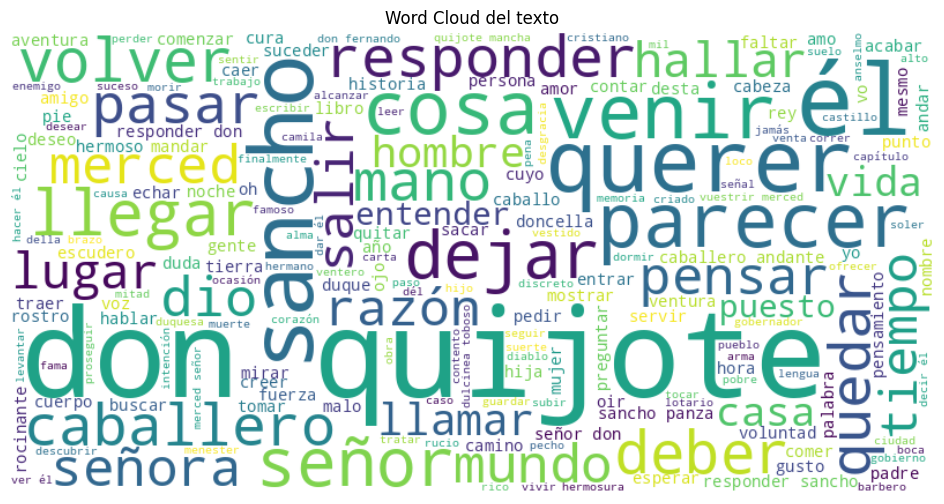

In [9]:
# ☁️ 7. WordCloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(tokens_limpios))
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud del texto")
plt.show()


In [10]:
# 📛 8. Bigramas más frecuentes
bigrams = zip(tokens_limpios, tokens_limpios[1:])
bigrams_freq = Counter(bigrams).most_common(10)

for par, freq in bigrams_freq:
    print(f"{par}: {freq}")


('don', 'quijote'): 2236
('responder', 'sancho'): 306
('sancho', 'panza'): 299
('responder', 'don'): 273
('caballero', 'andante'): 246
('señor', 'don'): 182
('quijote', 'mancha'): 145
('vuestrir', 'merced'): 141
('don', 'fernando'): 131
('merced', 'señor'): 120


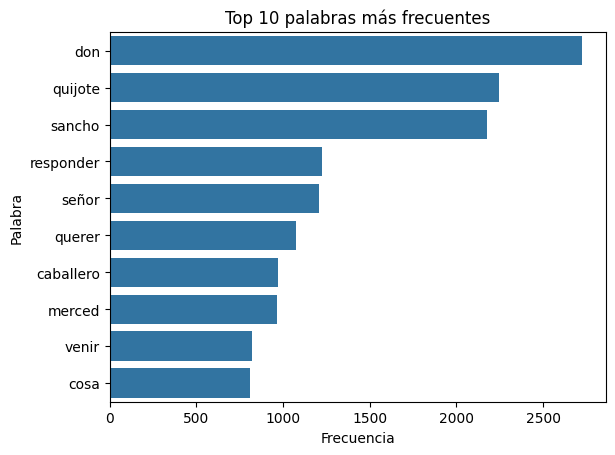

In [11]:
import seaborn as sns
import pandas as pd

palabras_df = pd.DataFrame(frecuencia, columns=['palabra', 'frecuencia'])
sns.barplot(data=palabras_df, x='frecuencia', y='palabra')
plt.title("Top 10 palabras más frecuentes")
plt.xlabel("Frecuencia")
plt.ylabel("Palabra")
plt.show()

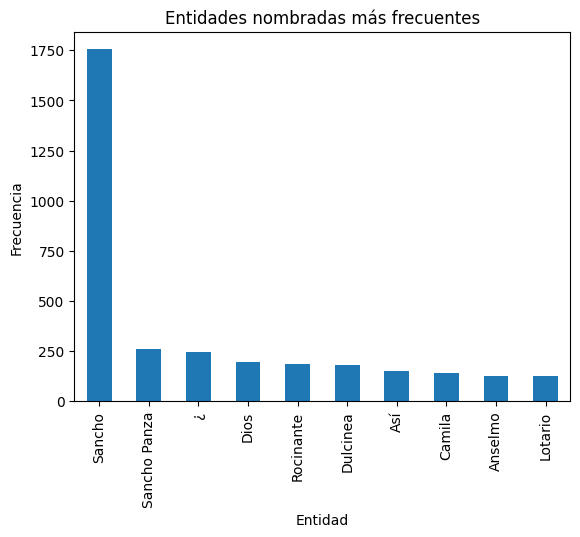

In [12]:
ents = [ent.text for ent in doc.ents if ent.label_ in ['PER', 'LOC', 'ORG']]
ent_freq = Counter(ents).most_common(10)
pd.DataFrame(ent_freq, columns=["Entidad", "Frecuencia"]).plot.bar(x='Entidad', y='Frecuencia', legend=False)
plt.title("Entidades nombradas más frecuentes")
plt.ylabel("Frecuencia")
plt.show()

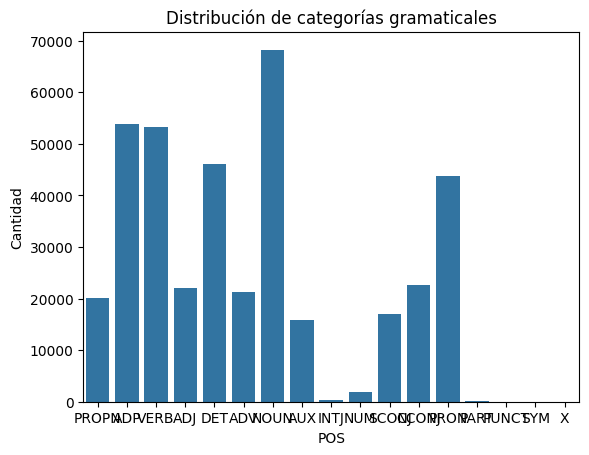

In [13]:
from collections import Counter
pos_counts = Counter([token.pos_ for token in doc if token.is_alpha])
sns.barplot(x=list(pos_counts.keys()), y=list(pos_counts.values()))
plt.title("Distribución de categorías gramaticales")
plt.xlabel("POS")
plt.ylabel("Cantidad")
plt.show()


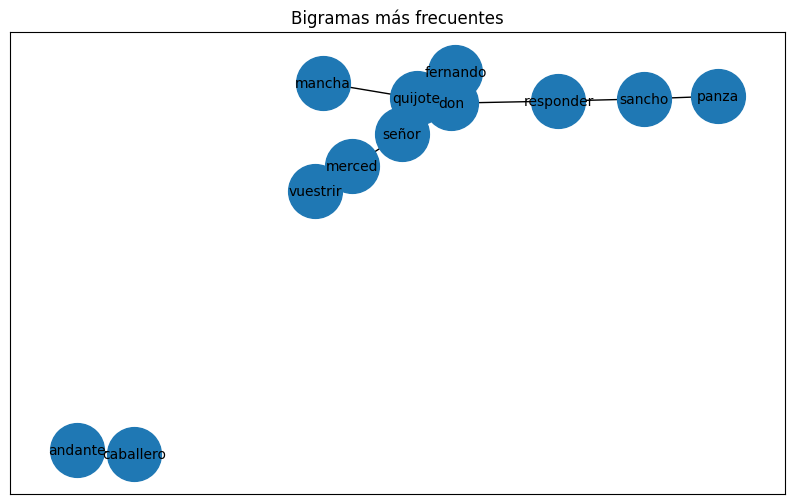

In [14]:
import networkx as nx

G = nx.Graph()
for (w1, w2), freq in bigrams_freq:
    G.add_edge(w1, w2, weight=freq)

plt.figure(figsize=(10,6))
nx.draw_networkx(G, with_labels=True, node_size=1500, font_size=10)
plt.title("Bigramas más frecuentes")
plt.show()




In [15]:
from textblob import TextBlob

# Assuming 'tokens_limpios' from previous cell contains the processed text
texto_procesado = ' '.join(tokens_limpios)  # Join the tokens into a string

# Análisis de sentimientos por párrafo o línea
sentimientos = []
for frase in texto_procesado.split('\n'):
    blob = TextBlob(frase)
    sentimientos.append((frase, blob.sentiment.polarity))

# Mostrar las frases más positivas y más negativas
sentimientos_ordenados = sorted(sentimientos, key=lambda x: x[1])
print("Frase más negativa:\n", sentimientos_ordenados[0])
print("\nFrase más positiva:\n", sentimientos_ordenados[-1])


Frase más negativa:
 ('project gutenberg ebook of don quijote by miguel cervantes saavedra this ebook is for the use of anyonir anywherar in the united states and most other parts of the world at cost and with almost restrictions whatsoever you may copy it give it away or it under the terms of the project gutenberg license included with this ebook or online at if you are not located in the united states you will have to check the laws of the country wherar you are located before using this ebook title don quijote author miguel cervantes saavedra release date december ebook most recently updated january language spanish character set encoding produced by an anonymous project gutenberg volunteer and joaquin cuenca abela start of the project gutenberg ebook don quijote ingenioso hidalgo don quijote mancha miguel cervantes saavedra ingenioso hidalgo don quijote mancha tasa testimonio erratas rey duque béjar prólogo libro don quijote mancha tratar condición ejercicio famoso hidalgo don quij

In [16]:

from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

sentimientos = []
for frase in texto_procesado.split('\n'):
    score = sia.polarity_scores(frase)['compound']
    sentimientos.append((frase, score))

# Frases con sentimiento más marcado
sentimientos_ordenados = sorted(sentimientos, key=lambda x: x[1])
print("Frase más negativa:\n", sentimientos_ordenados[0])
print("\nFrase más positiva:\n", sentimientos_ordenados[-1])


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Frase más negativa:
 ('project gutenberg ebook of don quijote by miguel cervantes saavedra this ebook is for the use of anyonir anywherar in the united states and most other parts of the world at cost and with almost restrictions whatsoever you may copy it give it away or it under the terms of the project gutenberg license included with this ebook or online at if you are not located in the united states you will have to check the laws of the country wherar you are located before using this ebook title don quijote author miguel cervantes saavedra release date december ebook most recently updated january language spanish character set encoding produced by an anonymous project gutenberg volunteer and joaquin cuenca abela start of the project gutenberg ebook don quijote ingenioso hidalgo don quijote mancha miguel cervantes saavedra ingenioso hidalgo don quijote mancha tasa testimonio erratas rey duque béjar prólogo libro don quijote mancha tratar condición ejercicio famoso hidalgo don quij

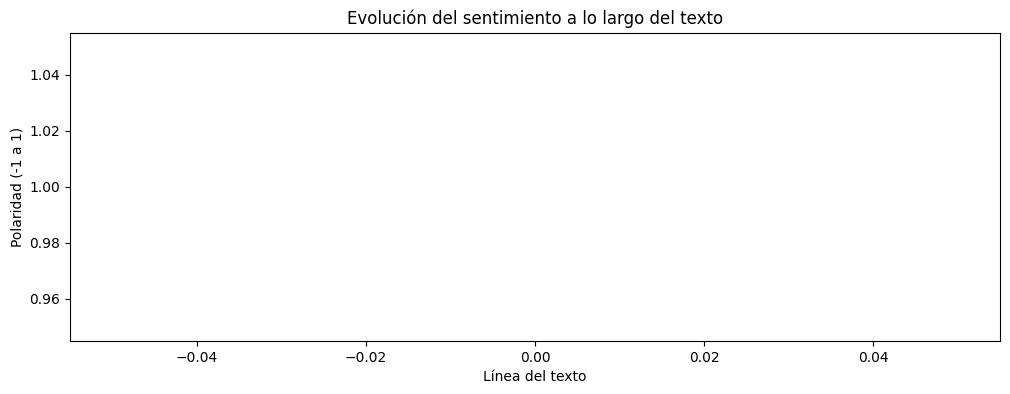

In [17]:
import matplotlib.pyplot as plt

polaridades = [s[1] for s in sentimientos]
plt.figure(figsize=(12, 4))
plt.plot(polaridades)
plt.title("Evolución del sentimiento a lo largo del texto")
plt.xlabel("Línea del texto")
plt.ylabel("Polaridad (-1 a 1)")
plt.show()
